# Malus law

with two polarizers and a lens to focus light

In [1]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_masks_XY import Vector_mask_XY

from py_pol.jones_vector import Jones_vector
from py_pol.jones_matrix import Jones_matrix

from matplotlib import cm

In [2]:
num_data =  256
length = 1*mm
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 1* um

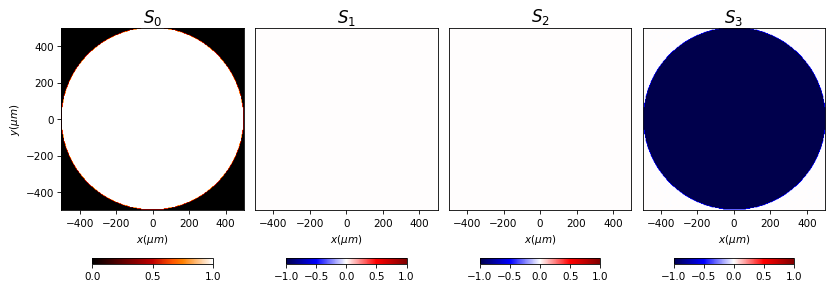

In [3]:
## Generation of vector light source

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave(A=1)

E0 = Vector_source_XY(x0, y0, wavelength)
E0.constant_polarization(u=u0, v=(1/np.sqrt(2), 1j/np.sqrt(2)))
E0.pupil()
E0.draw('stokes')

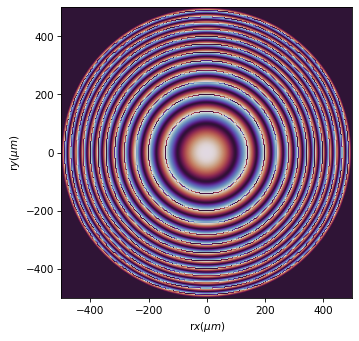

In [4]:
focal = 10*mm

t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.lens(r0=(0,0), focal=focal)
t1.pupil()
t1.draw(kind='phase', percentage_intensity=0.01)

In [5]:
p0 = Jones_matrix()
p0.diattenuator_perfect(azimuth=0*degrees)

P0 = Vector_mask_XY(x0,y0,wavelength)
P0.from_py_pol(p0)

P1 = Vector_mask_XY(x0,y0,wavelength)

p1 = Jones_matrix()


r_max = 10*um
xout = np.linspace(-r_max, r_max, 250)
yout = np.linspace(-r_max, r_max, 250)


In [6]:
angles = np.linspace(-180*degrees,180*degrees, 91)
intensities = np.zeros_like(angles)
intensities2 = np.zeros_like(angles)

for i, angle in enumerate(angles):
    print(i, end="\r")
    p1.diattenuator_perfect(azimuth=angle)
    P1.from_py_pol(p1)

    Es = E0 * (P0 * P1) 

    E1 = Es.apply_mask(t1, new_field=True)
    # E1.draw('fields')

    E2 = E1.VCZT(z=focal, xout=xout, yout=yout)
    #E2.draw('intensity')
    intensities2[i] = E2.intensity().mean()

    Is = E1.VCZT(z=focal,xout=0,yout=0)
    intensities[i] = (np.abs(Is[0])**2 + np.abs(Is[1])**2 + np.abs(Is[2])**2) / (num_data**1)


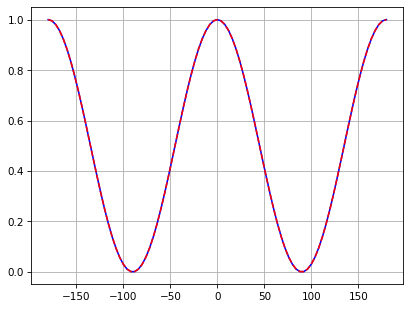

In [7]:
plt.figure()
plt.plot(angles/degrees,intensities/intensities.max(),'b')
plt.grid('on')

plt.plot(angles/degrees,intensities2/intensities2.max(),'r--')
plt.grid('on')